<a href="https://colab.research.google.com/github/MuhammedBassam/Multimedia/blob/main/Multimedia_Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Discrete Cosine Transform (DCT)**




# Objective: To visualize the importants of applying DCT to an image by changing the lest important coeeficnets to zero.

In [27]:
from google.colab import files
from numpy import asarray
from numpy import ndarray
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import cv2
from scipy.fftpack import dct, idct
from numpy import zeros
from numpy import r_

# *The cell below to upload the images "Colored image"*

In [2]:
image_x = files.upload()

Saving fish.PNG to fish.PNG


*This cell to upload the images "gray image"*


In [3]:
image_y = files.upload()

Saving 1.jpg to 1.jpg




```
# Using cv2.imread() method
# Using 0 to read image in grayscale mode```



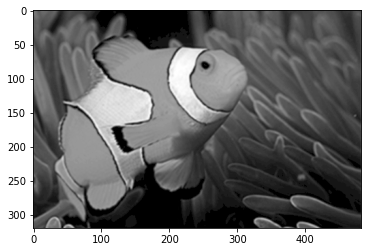

In [16]:
image_y1 = cv2.imread('fish.PNG',0)
# plt.imshow(image_y1)
plt.imshow(image_y1,cmap='gray')

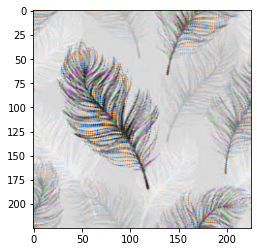

In [17]:
image_x1 = cv2.imread('1.jpg',0)
image_x2 = cv2.cvtColor(image_x1, cv2.COLOR_BAYER_GB2RGB)
plt.imshow(image_x2,cmap='gray')

In [9]:
# convert image to numpy array
data_y = asarray(image_y1)
print(type(data_y))
print(data_y.shape)
print(data_y)
print()

data_x = asarray(image_x2)
print(type(data_x))
# summarize shape
print(data_x.shape)
print(data_x)


<class 'numpy.ndarray'>
(320, 483)
[[132 117 115 ...  72  89 164]
 [130 117 115 ...  74  90 164]
 [128 117 116 ...  76  92 166]
 ...
 [103  87  84 ...  21  46 143]
 [ 99  82  78 ...  21  43 142]
 [ 96  78  76 ...  21  46 143]]

<class 'numpy.ndarray'>
(225, 225, 3)
[[[212 148 149]
  [212 148 149]
  [217 184 152]
  ...
  [226 225 229]
  [230 226 229]
  [230 226 229]]

 [[212 148 149]
  [212 148 149]
  [217 184 152]
  ...
  [226 225 229]
  [230 226 229]
  [230 226 229]]

 [[208 189 169]
  [208 189 169]
  [214 213 170]
  ...
  [227 230 227]
  [223 229 225]
  [223 229 225]]

 ...

 [[151 152 153]
  [151 152 153]
  [143 129 153]
  ...
  [224 225 225]
  [224 224 223]
  [224 224 223]]

 [[184 129 132]
  [184 129 132]
  [181 162 155]
  ...
  [225 228 221]
  [229 226 223]
  [229 226 223]]

 [[184 129 132]
  [184 129 132]
  [181 162 155]
  ...
  [225 228 221]
  [229 226 223]
  [229 226 223]]]


In [22]:
# implement 2D DCT
def dct2(a):
    return dct(dct(a.T, norm='ortho').T, norm='ortho')

# implement 2D IDCT
def idct2(a):
    return idct(idct(a.T, norm='ortho').T, norm='ortho') 


Perform a blockwise DCT





Apply 2D-DCT to the matrix

In [29]:
im_size_x = image_x2.shape
dct_Block = np.zeros(im_size_x)

# Do 8x8 DCT on image (in-place)
for i in r_[:im_size_x[0]:8]:
    for j in r_[:im_size_x[1]:8]:
        dct_Block[i:(i+8),j:(j+8)] = dct2( image_x2[i:(i+8),j:(j+8)] )

print(dct_Block)

[[[ 8.83041052e+02 -1.17500000e+01  4.76313972e+00]
  [ 8.83041052e+02 -1.17500000e+01  4.76313972e+00]
  [ 8.82428680e+02 -1.00000000e+00  1.12583302e+01]
  ...
  [ 1.11329309e+03 -1.25000000e+00 -4.33012702e-01]
  [ 1.12349930e+03  2.00000000e+00 -3.17542648e+00]
  [ 1.12349930e+03  2.00000000e+00 -3.17542648e+00]]

 [[-1.06750576e+01  8.15272339e+01  3.18474843e+01]
  [-1.06750576e+01  8.15272339e+01  3.18474843e+01]
  [ 3.50406090e+01  7.57997453e+01 -1.60246336e+01]
  ...
  [-1.54183622e+00 -1.62308702e+00  3.23692267e+00]
  [-1.07046141e+01 -3.87716810e-01  6.87672331e+00]
  [-1.07046141e+01 -3.87716810e-01  6.87672331e+00]]

 [[-3.62797515e+01  5.84766583e+01  2.95034956e+01]
  [-3.62797515e+01  5.84766583e+01  2.95034956e+01]
  [-1.07000037e+01  6.07631435e+01 -4.50576601e+00]
  ...
  [-9.75286862e-01 -1.17126394e+00 -1.58680389e+00]
  [ 6.81590512e+00  2.37769002e-01 -5.16994017e+00]
  [ 6.81590512e+00  2.37769002e-01 -5.16994017e+00]]

 ...

 [[ 1.20657018e+01  1.73760648e-01

Convert the last K coeffcients to zero (multiply the last (in zigzag
scan) DCT-Coefficients by zeros while all other coeeficients are left
the same).

Zigzag scan of a matrix, 
Argument is a two-dimensional matrix of any size,
not strictly a square one.
Function returns a 1-by-(m*n) array,
where m and n are sizes of an input matrix,
consisting of its items scanned by a zigzag method.

In [31]:
def zigzag(input):
    #initializing the variables
    #----------------------------------
    h = 0
    v = 0
    vmin = 0
    hmin = 0
    vmax = input.shape[0]
    hmax = input.shape[1]
    #print(vmax ,hmax )
    i = 0
    output = np.zeros(( vmax * hmax))
    #----------------------------------
    while ((v < vmax) and (h < hmax)):
        if ((h + v) % 2) == 0:                 # going up
            if (v == vmin):
            	#print(1)
                output[i] = input[v, h]        # if we got to the first line
                if (h == hmax):
                    v = v + 1
                else:
                    h = h + 1                        
                i = i + 1
            elif ((h == hmax -1 ) and (v < vmax)):   # if we got to the last column
            	#print(2)
            	output[i] = input[v, h] 
            	v = v + 1
            	i = i + 1
            elif ((v > vmin) and (h < hmax -1 )):    # all other cases
            	#print(3)
            	output[i] = input[v, h] 
            	v = v - 1
            	h = h + 1
            	i = i + 1
        else:                                    # going down
        	if ((v == vmax -1) and (h <= hmax -1)):       # if we got to the last line
        		#print(4)
        		output[i] = input[v, h] 
        		h = h + 1
        		i = i + 1
        	elif (h == hmin):                  # if we got to the first column
        		#print(5)
        		output[i] = input[v, h] 
        		if (v == vmax -1):
        			h = h + 1
        		else:
        			v = v + 1
        		i = i + 1
        	elif ((v < vmax -1) and (h > hmin)):     # all other cases
        		#print(6)
        		output[i] = input[v, h] 
        		v = v + 1
        		h = h - 1
        		i = i + 1
        if ((v == vmax-1) and (h == hmax-1)):          # bottom right element
        	#print(7)        	
        	output[i] = input[v, h] 
        	break
    #print ('v:',v,', h:',h,', i:',i)
    return output

Inverse zigzag scan of a matrix, 
Arguments are: a 1-by-m*n array, 
where m & n are vertical & horizontal sizes of an output matrix.
Function returns a two-dimensional matrix of defined sizes,
consisting of input array items gathered by a zigzag method.

In [32]:
def inverse_zigzag(input, vmax, hmax):
	#print input.shape
	# initializing the variables
	#----------------------------------
	h = 0
	v = 0
	vmin = 0
	hmin = 0
	output = np.zeros((vmax, hmax))
	i = 0
	while ((v < vmax) and (h < hmax)): 
		#print ('v:',v,', h:',h,', i:',i)   	
		if ((h + v) % 2) == 0:                 # going up     
			if (v == vmin):
				output[v, h] = input[i]        # if we got to the first line
				if (h == hmax):
					v = v + 1
				else:
					h = h + 1                        
				i = i + 1
			elif ((h == hmax -1 ) and (v < vmax)):   # if we got to the last column
				#print(2)
				output[v, h] = input[i] 
				v = v + 1
				i = i + 1
			elif ((v > vmin) and (h < hmax -1 )):    # all other cases
				#print(3)
				output[v, h] = input[i] 
				v = v - 1
				h = h + 1
				i = i + 1
		else:                                    # going down
			if ((v == vmax -1) and (h <= hmax -1)):       # if we got to the last line
				#print(4)
				output[v, h] = input[i] 
				h = h + 1
				i = i + 1
			elif (h == hmin):                  # if we got to the first column
				#print(5)
				output[v, h] = input[i] 
				if (v == vmax -1):
					h = h + 1
				else:
					v = v + 1
				i = i + 1  		
			elif((v < vmax -1) and (h > hmin)):     # all other cases
				output[v, h] = input[i] 
				v = v + 1
				h = h - 1
				i = i + 1
		if ((v == vmax-1) and (h == hmax-1)):          # bottom right element
			#print(7)        	
			output[v, h] = input[i] 
			break
	return output

doing zigzag for each block

In [ ]:
for i in r_[:im_size_x[0]:8]:
    for j in r_[:im_size_x[1]:8]:
      x = zigzag(dct_Block[i:(i+8),j:(j+8)])

Convert the last 3 coeffcients to zero



In [ ]:
k =3;
for i in range(len(x)):
  if(i>(len(x)-k)):
    x[i] = 0


Convert the last 5 coeffcients to zero


In [ ]:
k =5;
for i in range(len(x)):
  if(i>(len(x)-k)):
    x[i] = 0


doing inverse zigzag for each block

In [ ]:
for i in r_[:x[0]:8]:
    for j in r_[:x[1]:8]:
      x_in= inverse_zigzag(x, 8, 8):

for i in r_[:im_size_x[0]:8]:
    for j in r_[:im_size_x[1]:8]:
        dct_Block_inverse[i:(i+8),j:(j+8)] = idct2(x_in)

print(dct_Block_inverse)